# Pymaceuticals Inc.
---

### Analysis

Capomulin works significantly better than 80% of the other drugs tested.
Capomulin has less variance than all other tested drugs. 
The inner quartile range of Capomulin is lower than Ramicane showing more consistent results for the mice within the first and 3rd quartiles.  

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [3]:
# Checking the number of mice.
num_mice = len(merged_df["Mouse ID"].unique())
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse989 = merged_df.loc[merged_df['Mouse ID'] == 'g989']
mouse989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df = merged_df.drop(merged_df[merged_df["Mouse ID"] == "g989"].index)
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(merged_df["Mouse ID"].unique())
num_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean = grouped.mean()
median = grouped.median()
variance = grouped.var()
std_dev = grouped.std()
sem = grouped.sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, 
                           "Tumor Volume Std. Dev.": std_dev, "Tumor Volume Std. Err.": sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = merged_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_df = summary_df.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'StdDev', 'sem': 'Std Err'})

summary_df


,Mean,Median,Variance,StdDev,Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

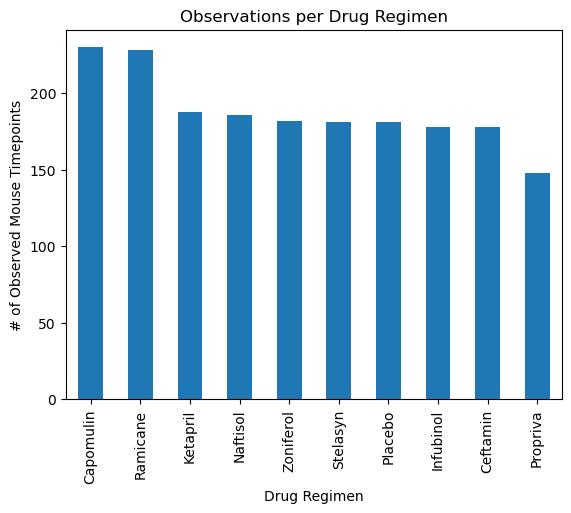

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = merged_df["Drug Regimen"].value_counts()

ax = drug_counts.plot(kind="bar",rot=90)

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
ax.set_title("Observations per Drug Regimen")

plt.show()

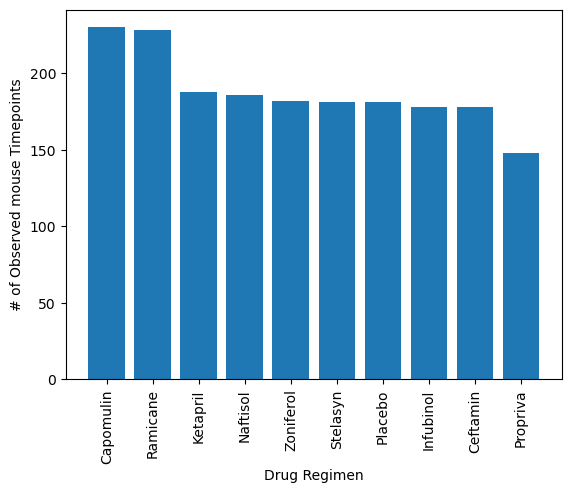

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = merged_df["Drug Regimen"].value_counts()

plt.bar(drug_counts.index, drug_counts.values)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed mouse Timepoints")

plt.xticks(rotation=90)

plt.show()

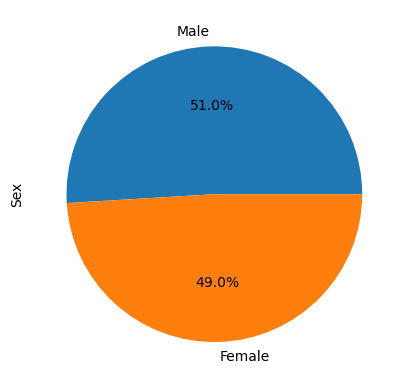

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = merged_df["Sex"].value_counts()

gender_counts.plot(kind="pie", autopct="%1.1f%%")

plt.show()

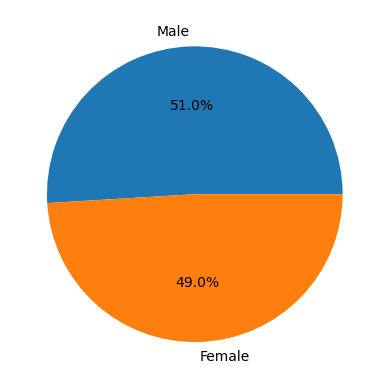

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = merged_df["Sex"].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol = merged_df[merged_df["Drug Regimen"].isin(treatments)]

last_timepoints = tumor_vol.groupby("Mouse ID")["Timepoint"].max().reset_index()

final_tumor_vol = pd.merge(last_timepoints, tumor_vol, on=["Mouse ID", "Timepoint"])

final_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == treatment].groupby("Mouse ID")["Timepoint"].max().reset_index()
    tumor_vol_df = pd.merge(final_tumor_vol, merged_df, on=["Mouse ID", "Timepoint"], how="left")["Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_vol_data.append(tumor_vol_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{treatment}'s potential outliers: {tumor_vol_df.loc[(tumor_vol_df < lower_bound) | (tumor_vol_df > upper_bound)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


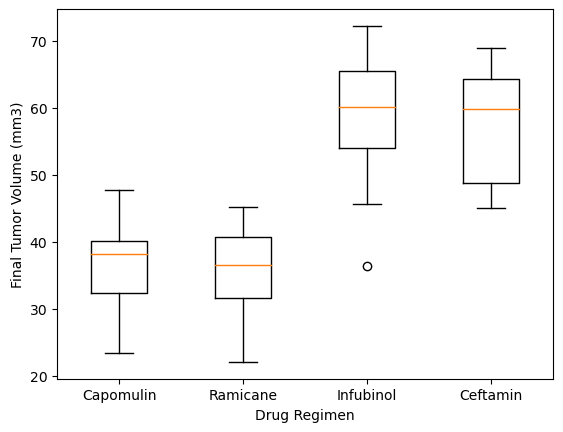

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

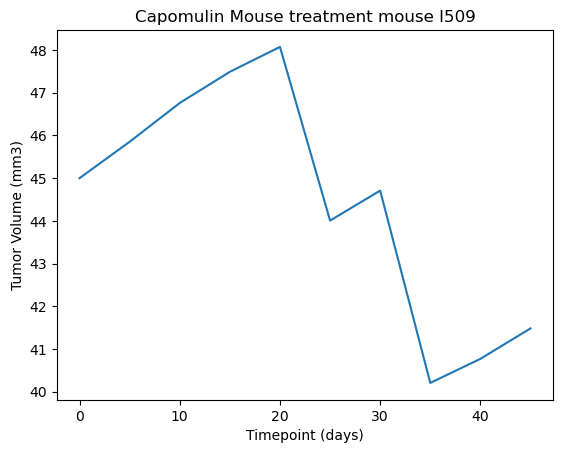

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

mouse_l509 = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509"]

plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Mouse treatment mouse I509")
plt.show()

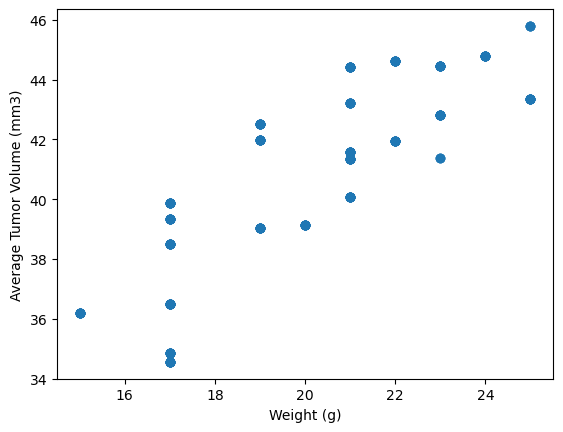

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

capomulin_summary = pd.merge(avg_tumor_vol, capomulin_data[["Mouse ID", "Weight (g)"]], on="Mouse ID")

plt.scatter(capomulin_summary["Weight (g)"], capomulin_summary["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.83.


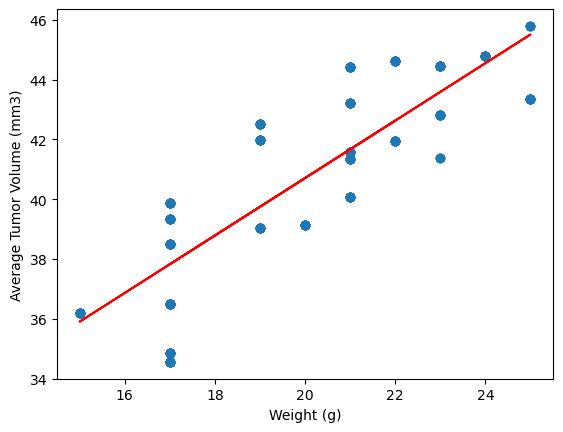

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

ccoe = st.pearsonr(capomulin_summary["Weight (g)"], capomulin_summary["Tumor Volume (mm3)"])[0]
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {ccoe:.2f}.")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_summary["Weight (g)"], capomulin_summary["Tumor Volume (mm3)"])
regress_values = capomulin_summary["Weight (g)"] * slope + intercept

plt.scatter(capomulin_summary["Weight (g)"], capomulin_summary["Tumor Volume (mm3)"])

plt.plot(capomulin_summary["Weight (g)"], regress_values, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
